In [1]:
!pip install statsmodels --upgrade

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
series=pd.read_excel("/content/msi.xlsx")

In [4]:
series.head()

,event_time,price_msi
0,2020-12-23,449.51
1,2020-12-23,449.51
2,2021-02-23,449.51
3,2020-10-26,449.51
4,2021-01-10,449.51


In [5]:
series["event_time"]=pd.to_datetime(series["event_time"])

In [6]:
new_series=series.groupby("event_time").sum()

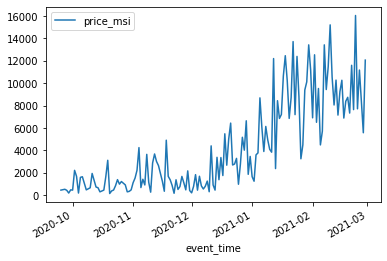

In [7]:
new_series.plot()

In [8]:
new_series.isnull().sum()

price_msi    0
dtype: int64

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adfuller_test(purchase):
    result=adfuller(purchase)
    labels = ['ADF Test Statistic','p-value']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(new_series["price_msi"])

ADF Test Statistic : -0.561842931380012
p-value : 0.8793729948033129
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
msi_diff=new_series["price_msi"].diff()

In [13]:
msi_diff=msi_diff.dropna()

In [14]:
adfuller_test(msi_diff)

ADF Test Statistic : -9.020052221797817
p-value : 5.808183033973445e-15
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [15]:
msi_diff.shape

(149,)

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


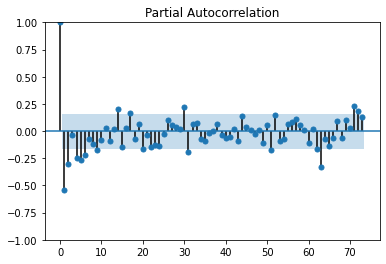

In [17]:
pacf_plot = plot_pacf(msi_diff,lags=73)


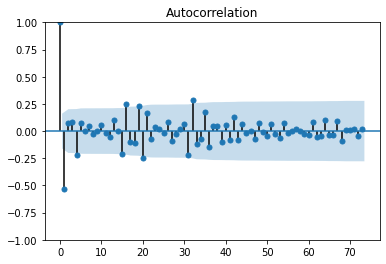

In [18]:
acf_plot = plot_acf(msi_diff, lags = 73)

In [19]:
import statsmodels.api as sm


In [20]:
model1 = sm.tsa.arima.ARIMA(new_series, order=(0,1,1))
result1 = model1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              price_msi   No. Observations:                  150
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1359.828
Date:                Thu, 12 May 2022   AIC                           2723.656
Time:                        08:19:53   BIC                           2729.664
Sample:                             0   HQIC                          2726.097
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8093      0.040    -19.990      0.000      -0.889      -0.730
sigma2       4.93e+06   4.25e+05     11.589      0.000     4.1e+06    5.76e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                20.38
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               8.61   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
forecast_1=result1.predict(start=119,end=149,dynamic=True)


In [23]:
msi_diff.index=range(0,149)

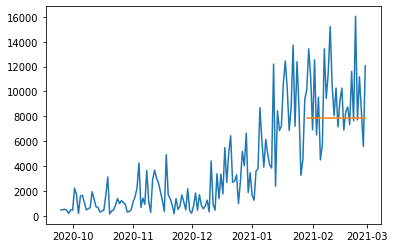

In [24]:
plt.plot(new_series)
plt.plot(forecast_1)
plt.show()

In [25]:
model2=sm.tsa.statespace.SARIMAX(new_series,order=(1, 1, 2),seasonal_order=(0,1,1,31))
results2=model2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [26]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            price_msi   No. Observations:                  150
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 31)   Log Likelihood               -1098.363
Date:                              Thu, 12 May 2022   AIC                           2206.726
Time:                                      08:20:00   BIC                           2220.580
Sample:                                           0   HQIC                          2212.351
                                              - 150                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8916      0.143      6.239      0.000       0.612       1.172
ma.L1         -1.8061      0.112    -16.159      0.000      -2.025      -1.587
ma.L2          0.8311      0.092      9.028      0.000       0.651       1.012
ma.S.L31      -0.9936      0.115     -8.674      0.000      -1.218      -0.769
sigma2       5.34e+06   2.16e-08   2.48e+14      0.000    5.34e+06    5.34e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 6.59
Prob(Q):                              0.86   Prob(JB):                         0.04
Heteroskedasticity (H):               7.39   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.37e+29. Standard errors may be unstable.
"""

In [46]:
forecast_2=results2.predict(start=119,end=148,dynamic=True)


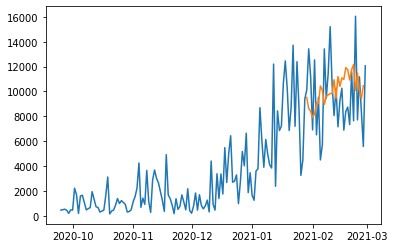

In [47]:
plt.plot(new_series)
plt.plot(forecast_2)
plt.show()

In [48]:
y=new_series.price_msi[119:149]

In [49]:
y

event_time
2021-01-29    10123.15
2021-01-30    13429.35
2021-01-31    11181.42
2021-02-01     6909.67
2021-02-02    12542.34
2021-02-03     6511.18
2021-02-04     9530.74
2021-02-05     4488.74
2021-02-06     5719.49
2021-02-07    13430.43
2021-02-08     9438.21
2021-02-09    11484.64
2021-02-10    15216.53
2021-02-11    10559.64
2021-02-12     8056.53
2021-02-13    10279.43
2021-02-14     7153.79
2021-02-15     9250.26
2021-02-16    10266.37
2021-02-17     6888.74
2021-02-18     8388.54
2021-02-19     8743.90
2021-02-20     7335.35
2021-02-21    11603.52
2021-02-22     7642.78
2021-02-23    16055.80
2021-02-24     7713.62
2021-02-25    11178.90
2021-02-26     8341.42
2021-02-27     5575.27
Name: price_msi, dtype: float64

In [50]:
residuals=forecast_2-y

In [51]:
residuals

event_time
2021-01-29    -607.496531
2021-01-30   -4799.209934
2021-01-31   -2781.164716
2021-02-01     974.714140
2021-02-02   -4360.061775
2021-02-03    2643.245417
2021-02-04    -487.969505
2021-02-05    5951.740489
2021-02-06    4382.046011
2021-02-07   -4480.066970
2021-02-08     166.938749
2021-02-09   -1754.826550
2021-02-10   -5383.472111
2021-02-11    -729.396139
2021-02-12    2888.411023
2021-02-13    -849.757549
2021-02-14    4048.717177
2021-02-15    1161.540848
2021-02-16     830.641602
2021-02-17    4078.313466
2021-02-18    3531.315222
2021-02-19    3010.697039
2021-02-20    3582.807491
2021-02-21     147.259727
2021-02-22    4528.508171
2021-02-23   -5970.654153
2021-02-24    3772.460515
2021-02-25   -1089.980697
2021-02-26    1097.343757
2021-02-27    4888.220465
dtype: float64

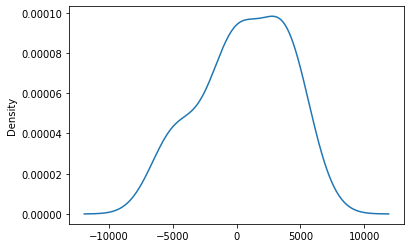

In [52]:
residuals.plot(kind='kde')
plt.show()

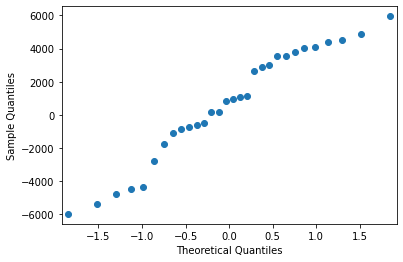

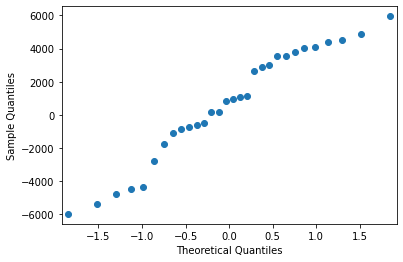

In [53]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals)

In [54]:
RSS=sum(residuals**2)

In [55]:
RSS

340835084.9429775

In [56]:
TSS=new_series["price_msi"]-new_series["price_msi"].mean()

In [57]:
TSS

event_time
2020-09-25   -3840.438933
2020-09-27   -3766.388933
2020-09-28   -3859.828933
2020-09-29   -4102.658933
2020-09-30   -3818.428933
                 ...     
2021-02-24    3423.671067
2021-02-25    6888.951067
2021-02-26    4051.471067
2021-02-27    1285.321067
2021-02-28    7776.321067
Name: price_msi, Length: 150, dtype: float64

In [58]:
TSS_Squared=sum(TSS**2)

In [59]:
r_squared= 1-(RSS/TSS_Squared)

In [60]:
r_squared

0.8610094564487631

In [61]:
from scipy.stats import shapiro

In [62]:
shapiro(residuals)

(0.9449012279510498, 0.12329534441232681)